## MULTILAYER PERCEPTRON MODEL

##### 1) Implementation of MLP Algorithm

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [30]:
from mlp import MLPAlgorithm

##### 2) Preprocessing

In [31]:
# Generate dataset for non-linear separable problem
X, y = make_moons(n_samples=100, noise=0.12, random_state=42)

# Create DataFrame
dataset = pd.DataFrame(X, columns=["Feature1", "Feature2"])
dataset["Class"] = y

# Save the dataset to a CSV file
dataset.to_csv("non_linear_separable_dataset.csv", index=False)

print(dataset.head())

   Feature1  Feature2  Class
0  1.594749 -0.463949      1
1  0.075566  0.465281      1
2  0.740863 -0.387022      1
3 -1.074855  0.240216      0
4 -0.772783  0.180240      0


In [32]:
# split independent and dependent variables
x = dataset.iloc[:100, [0, 1]].values
y = dataset.iloc[:100, -1].values

In [33]:
x[:5]

array([[ 1.59474918, -0.46394924],
       [ 0.07556595,  0.46528072],
       [ 0.74086285, -0.3870225 ],
       [-1.07485509,  0.24021605],
       [-0.77278279,  0.18024042]])

In [34]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

##### 3) Exploratory Analysis of data

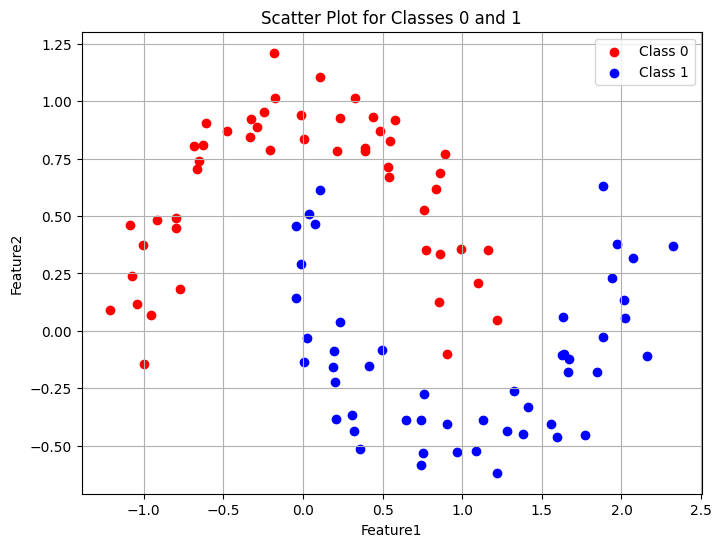

In [35]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

plt.title('Scatter Plot for Classes 0 and 1')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.grid(True)
plt.show()

##### 4) Training step

In [39]:
model = MLPAlgorithm(eta=0.01, max_epochs=1500, threshold=0.001)
model.build_architecture(input_length = 2, hidden_length = 10, output_length = 1)
model.fit(x, y)

Epoch  100 : loss =  0.07986
Epoch  200 : loss =  0.05546
Epoch  300 : loss =  0.04915
Epoch  400 : loss =  0.04673
Epoch  500 : loss =  0.04572
Epoch  600 : loss =  0.04527
Epoch  700 : loss =  0.04505
Epoch  800 : loss =  0.04493
Epoch  900 : loss =  0.04486
Epoch  1000 : loss =  0.04481
Epoch  1100 : loss =  0.04478
Epoch  1200 : loss =  0.04475
Epoch  1300 : loss =  0.04473
Epoch  1400 : loss =  0.04472
Epoch  1500 : loss =  0.0447


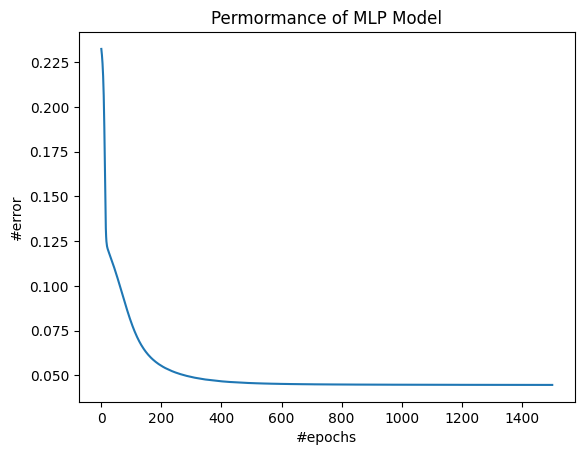

In [41]:
plt.plot(range(len(model.cost_)), model.cost_)
plt.title("Permormance of MLP Model")
plt.xlabel("#epochs")
plt.ylabel("#error")
plt.show()

##### 5) Testing the model

In [43]:
# Generate test dataset for non-linear separable problem
X_test, y_test = make_moons(n_samples=100, noise=0.12, random_state=43)

# Create DataFrame
test_dataset = pd.DataFrame(X_test, columns=["Feature1", "Feature2"])
test_dataset["Class"] = y_test

# Save the dataset to a CSV file
test_dataset.to_csv("non_linear_separable_test_dataset.csv", index=False)

print(test_dataset.head())

   Feature1  Feature2  Class
0  0.106202  1.020363      0
1  1.094005  0.242918      0
2  0.496939  0.857124      0
3  0.160225  1.070166      0
4  0.152415  0.076950      1


In [44]:
x_testing = test_dataset.iloc[:100, [0, 1]].values
y_testing = test_dataset.iloc[:100, -1].values

In [45]:
model.test(x_testing, y_testing)
print(f'MLP accuracy: {model.accuracy}%')

MLP accuracy: 87.0%


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = model.test(x_testing, y_testing)
print(f'accuracy_score = {accuracy_score(y_testing, y_pred)}')
print(f'precision_score = {precision_score(y_testing, y_pred)}')
print(f'recall_score = {recall_score(y_testing, y_pred)}')
print(f'f1_score = {f1_score(y_testing, y_pred)}')
print(confusion_matrix(y_testing, y_pred))

accuracy_score = 0.87
precision_score = 0.8627450980392157
recall_score = 0.88
f1_score = 0.8712871287128713
[[43  7]
 [ 6 44]]
